In [1]:
from setfit import SetFitModel, SetFitTrainer, sample_dataset
from datasets import load_dataset, Dataset
from sentence_transformers.losses import CosineSimilarityLoss

import pandas as pd
import seaborn as sns

c:\Users\niloy\anaconda3\envs\torch_env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Read Data -> Dataset used here is the twitter extracted sentiment dataset from Kaggle
trainDS = pd.read_csv('train.csv')
trainDS.sample(10)

,textID,text,selected_text,sentiment
15716,d3746ae467,ur welcome u finished ur speech (typed it an...,welcome,positive
22063,8d338cca4a,Any tips for someone who has only made it 52 ...,Any tips for someone who has only made it 52 o...,neutral
24764,1bc5ee4931,early morning~2:30 am~what`s up? I am!~~!!play...,early morning~2:30 am~what`s up? I am!~~!!play...,neutral
2921,8d9769220b,10 minutes to boarding; 14 hours to home. no w...,no window seat,negative
3705,d3b3d844df,"Gosh, no need to be so rude.","Gosh, no need to be so rude.",negative
17114,3a4256c114,"Mom just 'he`d' me. *sigh* She`s wonderful, an...","Mom just 'he`d' me. *sigh* She`s wonderful, an...",neutral
7725,2a2c4903fe,I sent u a direct message.. there`s my mail,I sent u a direct message.. there`s my mail,neutral
2017,914980413d,i have to study :O talk to you later ****,i have to study :O talk to you later ****,neutral
21738,78dfe74caa,i want a dog or a cat or something i want som...,"o unconditonally love,",positive
20576,daac7e9b88,Someone just admitted to having a crush on me....,That`s cool,positive


In [3]:
replacement_dict = {'positive': 1, 'negative': 2, 'neutral': 0}
trainDS['sentiment'] = trainDS['sentiment'].replace(replacement_dict)

In [4]:
trainDS.sample(10)

,textID,text,selected_text,sentiment
16177,72f147c47c,happy mother`s day to all your mom`s,happy mother`s day to all your mom`s,1
27313,fe12b8fd85,The young lady in the local Chinese taking ord...,very cute indeed.,1
5300,662815867d,- for all dad is doing like this to his son/d...,love,1
27336,8aff09d2b3,I`m calling your room-mate!!!,I`m calling your room-mate!!!,0
16341,35b63d47cb,you are disappointing me......,you are disappointing me..,2
24882,3e61dc8b4e,OMJ! J.O.N.A.S. is the best tv show EVER! ?,OMJ! J.O.N.A.S. is the best tv show EVER! ?,0
24409,18418da3ea,_ - hey there. How was your day?,_ - hey there. How was your day?,0
18879,706510b794,"yeah, that was my point >.< please dont make ...",worse,2
10185,81b61650fa,I ruined my lunch by eating half a bag of ched...,now I feel sick.,2
1028,ee0d5790a6,it`s Mothers Day today,it`s Mothers Day today,0


In [5]:
trainDS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27481 entries, 0 to 27480
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   textID         27481 non-null  object
 1   text           27480 non-null  object
 2   selected_text  27480 non-null  object
 3   sentiment      27481 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 858.9+ KB


(27481, 4)


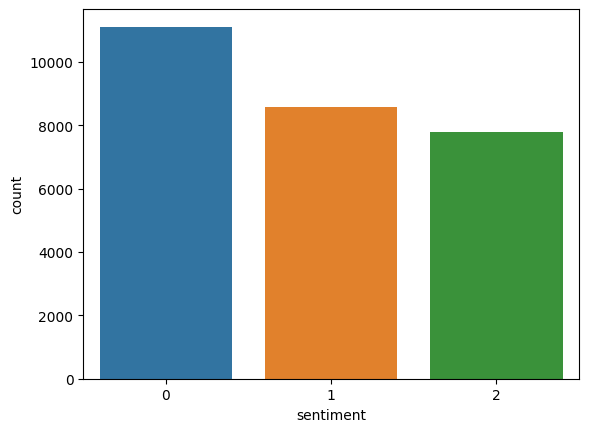

In [6]:
sns.countplot(trainDS,x='sentiment')
print(trainDS.shape)

In [7]:
sampleDS = trainDS[:100]   # 100 sample taken
sampleDS.to_csv('sampleTrainDS.csv')

valDS = trainDS[27460:]     # last 20 sample taken for validation
valDS.to_csv('sampleValDS.csv')

In [8]:
# Load Dataset
dataset = load_dataset('csv', data_files={
    'train':['sampleTrainDS.csv'],
    'eval':['sampleValDS.csv']},
)

Extracting data files: 100%|██████████| 2/2 [00:00<00:00, 333.36it/s]


Dataset csv downloaded and prepared to C:/Users/niloy/.cache/huggingface/datasets/csv/default-1f3741788e5beb2f/0.0.0/eea64c71ca8b46dd3f537ed218fc9bf495d5707789152eb2764f5c78fa66d59d. Subsequent calls will reuse this data.


100%|██████████| 2/2 [00:00<00:00, 78.37it/s]


In [13]:
from transformers import AutoModel

In [17]:
model = SetFitModel.from_pretrained("./miniLM/")

c:\Users\niloy\anaconda3\envs\torch_env\Lib\site-packages\sklearn\base.py:318: UserWarning: Trying to unpickle estimator LogisticRegression from version 1.1.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [18]:
model(["Hello how are you"]).item()

0

The training part was error prone in ipynb format, thats why it was done on a modular file.

In [9]:
# Model from Huggingface
# model = SetFitModel.from_pretrained(
#     "sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2",
# )

In [10]:
# trainer
# trainer = SetFitTrainer(
#     model=model,
#     train_dataset=dataset['train'],
#     eval_dataset=dataset['eval'],
#     loss_class=CosineSimilarityLoss,
#     metric="accuracy",
#     batch_size=16,
#     num_iterations=20,  # The number of text pairs to generate for contrastive learning
#     num_epochs=1,  # The number of epochs to use for contrastive learning
#     column_mapping={"text": "text", "sentiment": "label"}  # Map dataset columns to text/label expected by trainer
# )

In [11]:
# trainer.train()
# metrics = trainer.evaluate()

In [12]:
# save
# trainer.model._save_pretrained(save_directory="miniLM")